## Preprocess data

In [33]:
import os
from os import listdir
from os.path import isfile, join
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import sys

### Resize images to 224x224x3

In [34]:
def resize_images(img_path, conv_path):
    """
    Resize images with 224*224*3
    """

    if not os.path.exists(conv_path):
        os.makedirs(conv_path)
        print("\nNew Directory created")
    onlyfiles = [f for f in listdir(img_path) if isfile(join(img_path, f))]
    print("Total files in input dir: {}".format(len(onlyfiles)))
    for i,f in enumerate(onlyfiles):
        #print(i)
        #print(f)
        img = Image.open(img_path+'/'+f)
        img = img.resize((224,224), Image.ANTIALIAS)
        newPath = conv_path+'/'+str(i)+'.jpeg'
        sys.stdout.write("\r {}".format(newPath))
        sys.stdout.flush()
        img.save(newPath)
        im = cv2.imread(newPath)
        if(im.shape[2] != 3):
            print(im.shape)


### Convert images into list

In [35]:
def convert_images(img_path, label):
    """
    Convert images into list
    """
    onlyfiles = [f for f in listdir(img_path) if isfile(join(img_path,f))]

    data = []
    label = []
    rgb = []
    for i, f in enumerate(onlyfiles):
        img = cv2.imread(img_path+'/'+f)
        b,g,r = cv2.split(img)
        img2 = cv2.merge([r,g,b])
        rgb.append(img2)
        data.append(img)
        label.append(label)
    
    return rgb, label

### Find the 10% data 

In [36]:

def find_ten_percent(data):
    """
    calculate 10% of data
    """

    return int(len(data) * 0.1)

### Resize all images in images directory and store it in converted

In [37]:
folders = [name for name in os.listdir('./images')
            if os.path.isdir(os.path.join('./images', name))]
for d in folders:
    img_dir = './images/'+d
    conv_dir = './converted/'+d
    resize_images(img_dir, conv_dir)


New Directory created
Total files in input dir: 763
 ./converted/apple/762.jpeg
New Directory created
Total files in input dir: 862
 ./converted/banana/861.jpeg
New Directory created
Total files in input dir: 933
 ./converted/Broccoli/932.jpeg
New Directory created
Total files in input dir: 965
 ./converted/carrot/964.jpeg
New Directory created
Total files in input dir: 535
 ./converted/onion/534.jpeg
New Directory created
Total files in input dir: 920
 ./converted/pineapple/919.jpeg
New Directory created
Total files in input dir: 758
 ./converted/pumpkin/757.jpeg

### Convert images in converted directory to list

In [45]:
folders = [name for name in os.listdir('./converted')
            if os.path.isdir(os.path.join('./converted', name))]
train_list = []
test_list = []
train_list_label = []
test_list_label = []
for di, d in enumerate(folders):
    img_path = './converted/'+d
    onlyfiles = [f for f in listdir(img_path) if isfile(join(img_path,f))]
    print(len(onlyfiles))
    data = []
    label = []
    rgb = []
    for i, f in enumerate(onlyfiles):
        img = cv2.imread(img_path+'/'+f)
        b,g,r = cv2.split(img)
        img2 = cv2.merge([r,g,b])
        rgb.append(img2)
        data.append(img)
        label.append(di)
    #print(data)
    print(len(data))
    splitCount = int(len(rgb) * 0.1)
    print(len(rgb[:-splitCount]))
    print(len(rgb[-splitCount:]))
    pumtrain_list = (rgb[:-splitCount])
    pumtest_list = (rgb[-splitCount:])
    pumtrain_label_list = (label[:-splitCount])
    pumtest_label_list = (label[-splitCount:])
    print(len(pumtrain_list),' ',len(pumtrain_label_list),' test: ',len(pumtest_list),' ',len(pumtest_label_list))
    train_list += pumtrain_list
    test_list += pumtest_list
    train_list_label += pumtrain_label_list
    test_list_label += pumtest_label_list
    print('Total train data: ',len(train_list), 'total test ',(len(test_list)))
    print('Total train label: ',len(train_list_label), 'total test label',(len(test_list_label)))

763
763
687
76
687   687  test:  76   76
Total train data:  687 total test  76
Total train label:  687 total test label 76
862
862
776
86
776   776  test:  86   86
Total train data:  1463 total test  162
Total train label:  1463 total test label 162
933
933
840
93
840   840  test:  93   93
Total train data:  2303 total test  255
Total train label:  2303 total test label 255
965
965
869
96
869   869  test:  96   96
Total train data:  3172 total test  351
Total train label:  3172 total test label 351
535
535
482
53
482   482  test:  53   53
Total train data:  3654 total test  404
Total train label:  3654 total test label 404
920
920
828
92
828   828  test:  92   92
Total train data:  4482 total test  496
Total train label:  4482 total test label 496
758
758
683
75
683   683  test:  75   75
Total train data:  5165 total test  571
Total train label:  5165 total test label 571


### Shuffling the data

In [46]:
shuffle_train = []
for i,r in enumerate(train_list):
    d = []
    d.append(r)
    d.append(train_list_label[i])
    shuffle_train.append(d)
print('loop')
for i in range(50, 100):
    print(shuffle_train[i][1])

loop
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [48]:
set(test_list_label)

{0, 1, 2, 3, 4, 5, 6}

In [49]:
from random import shuffle
shuffle(shuffle_train)
print('loop')
for i in range(50, 100):
    print(shuffle_train[i][1])

loop
5
3
1
6
2
1
5
3
4
0
6
5
1
1
6
0
1
3
6
3
3
2
6
1
6
4
4
2
3
4
4
4
6
3
5
4
1
1
0
3
5
4
4
4
2
0
2
3
1
5


In [50]:
train_list = []
train_list_label = []
for i, d in enumerate(shuffle_train):
    train_list.append(d[0])
    train_list_label.append(d[1])
len(train_list)

5165

In [51]:
train_data = np.array(train_list)
train_label = np.array(train_list_label)
test_data = np.array(test_list)
test_label = np.array(test_list_label)
train_data.shape

(5165, 224, 224, 3)

In [52]:
data = {'train': train_data, 'train_labels': train_label, 'test':test_data, 'test_labels': test_label}

### Test images and labels

display image:  3


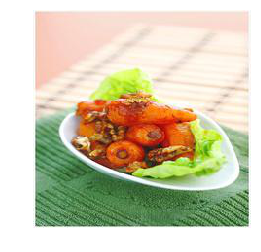

In [55]:
print('display image: ',train_label[100])
plt.axis('off')
plt.imshow(train_data[100])
plt.show()

In [56]:
import pickle


with open('new_data.pkl', 'wb') as handle:
    pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('new_data.pkl', 'rb') as handle:
    b = pickle.load(handle)


In [57]:
print(len(b['test']))
print(len(b['test_labels']))
print(len(b['train']))
print(len(b['train_labels']))

571
571
5165
5165
